In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.roach.heterodyne
reload(kid_readout.roach.heterodyne)

<module 'kid_readout.roach.heterodyne' from '/home/gjones/kid_readout/kid_readout/roach/heterodyne.pyc'>

In [238]:
import kid_readout.utils.sweeps
reload(kid_readout.utils.sweeps)

<module 'kid_readout.utils.sweeps' from '/home/gjones/kid_readout/kid_readout/utils/sweeps.py'>

In [3]:
ri = kid_readout.roach.heterodyne.RoachHeterodyne()

In [33]:
ri.initialize(use_config=False)

Reinitializing system
Deprogramming
Programming iq2xpfb14mcr6_2015_May_11_2241.bof
Requested sampling rate 512.0 MHz. Estimated sampling rate 513.0 MHz
starting udp server process on PPC
ssh root@roach "nohup /boffiles/udp/kid_ppc 701 < /dev/null &> /dev/null &"


In [67]:
ri.set_fft_gain(4)

In [35]:
ri.set_lo(1330.)

In [80]:
ri.set_tone_freqs(1330+np.arange(0,32)+512.0/2**17,nsamp=2**17)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



array([ 1330.00390625,  1331.00390625,  1332.00390625,  1333.00390625,
        1334.00390625,  1335.00390625,  1336.00390625,  1337.00390625,
        1338.00390625,  1339.00390625,  1340.00390625,  1341.00390625,
        1342.00390625,  1343.00390625,  1344.00390625,  1345.00390625,
        1346.00390625,  1347.00390625,  1348.00390625,  1349.00390625,
        1350.00390625,  1351.00390625,  1352.00390625,  1353.00390625,
        1354.00390625,  1355.00390625,  1356.00390625,  1357.00390625,
        1358.00390625,  1359.00390625,  1360.00390625,  1361.00390625])

In [81]:
ri.select_fft_bins(range(32))

In [82]:
ri.set_dac_atten(20)

In [88]:
d,addr = ri.get_data(4,demod=False)

In [89]:
ri.fpga_fft_readout_indexes

array([  0,  32,  64,  96, 128, 160, 192, 224, 256, 288, 320, 352, 384,
       416, 448, 480, 512, 544, 576, 608, 640, 672, 704, 736, 768, 800,
       832, 864, 896, 928, 960, 992])

In [90]:
ri.fft_bins

array([[  0,  32,  64,  96, 128, 160, 192, 224, 256, 288, 320, 352, 384,
        416, 448, 480, 512, 544, 576, 608, 640, 672, 704, 736, 768, 800,
        832, 864, 896, 928, 960, 992]])

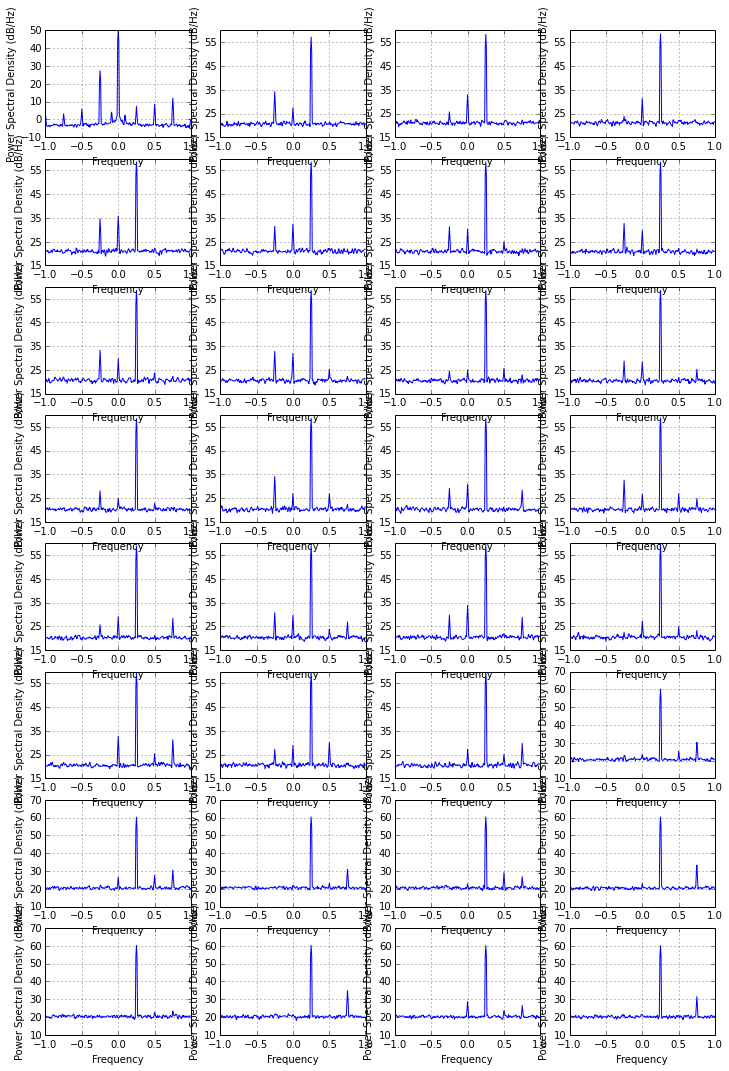

In [91]:
fig,axs = subplots(8,4,figsize=(12,18))
for k in range(32):
    ax = axs.flatten()[k]
    ax.psd(d[:,k])

In [114]:
ri.set_tone_freqs(np.array([1310.-1*512.0/2**17,1350.+1*512.0/2**17]),nsamp=2**17)
ri.select_fft_bins(range(2))

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



In [103]:
ri.set_dac_atten(30)

In [115]:
d,addr = ri.get_data(4,demod=True)

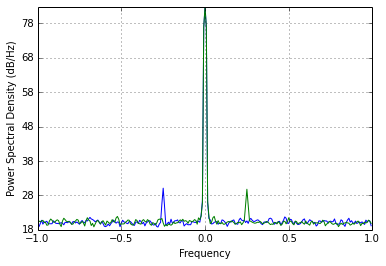

In [116]:
blah = psd(d[:,0])
blah = psd(d[:,1])

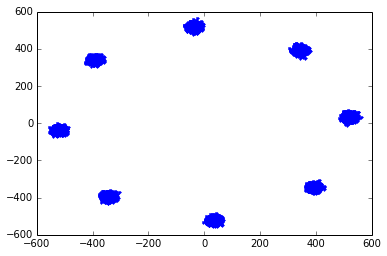

In [95]:
plot(d.real,d.imag,'.')

In [14]:
d.shape

(16384, 32)

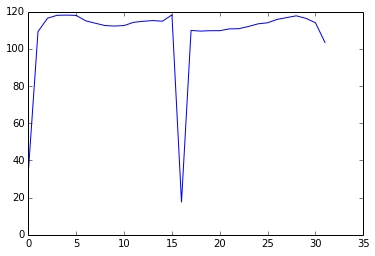

In [15]:
plot(np.abs(d).mean(0))

In [295]:
ri.set_lo(1320)

In [296]:
frq = kid_readout.utils.sweeps.prepare_sweep(ri,np.arange(-128,0)+1320.25,offsets=np.arange(0,128)*512.0/2**16,nsamp=2**17)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



In [204]:
ri.set_modulation_output('high')

0.0

In [243]:
ri.set_dac_atten(10)

In [297]:
swp3 = kid_readout.utils.sweeps.do_prepared_sweep(ri,nchan_per_step=32)

0.0 0.2 0.4 0.6 0.8 1.0 1.2 1.4 1.6 1.8 2.0 2.1 2.3 2.5 2.7 2.9 3.1 3.3 detected mcnt overflow None 491863 0 65536 0 208 491863
3.5 3.7 3.9 4.1 4.3 4.5 4.7 4.9 5.1 5.3 5.5 5.7 5.9 6.1 6.2 6.4 6.6 6.8 7.0 7.2 7.4 7.6 7.8 8.0 8.2 8.4 8.6 8.8 9.0 9.2 9.4 9.6 detected mcnt overflow None 622936 0 65536 0 640 622936
9.8 10.0 10.2 10.4 10.5 10.7 10.9 11.1 11.3 11.5 11.7 11.9 12.1 12.3 12.5 12.7 12.9 13.1 13.3 13.5 13.7 13.9 14.1 14.3 14.5 14.6 14.8 15.0 15.2 15.4 15.6 15.8 detected mcnt overflow None 360793 0 65536 0 896 360793
16.0 16.2 16.4 16.6 16.8 17.0 17.2 17.4 17.6 17.8 18.0 18.2 18.4 18.6 18.8 18.9 19.1 19.3 19.5 19.7 19.9 20.1 20.3 20.5 20.7 20.9 21.1 21.3 21.5 21.7 21.9 22.1 22.3 22.5 22.7 22.9 23.0 23.2 23.4 23.6 23.8 24.0 24.2 24.4 24.6 24.8 25.0 25.2 25.4 25.6 25.8 26.0 26.2 26.4 26.6 26.8 27.0 27.1 27.3 27.5 27.7 27.9 28.1 28.3 28.5 28.7 28.9 29.1 29.3 29.5 29.7 29.9 30.1 30.3 30.5 30.7 30.9 31.1 31.2 31.4 31.6 31.8 32.0 32.2 32.4 32.6 32.8 33.0 33.2 33.4 33.6 33.8 34.0 34.2 34.

In [298]:
frq = kid_readout.utils.sweeps.prepare_sweep(ri,np.arange(0,128)+1320.25,offsets=np.arange(0,128)*512.0/2**16,nsamp=2**17)
swp4 = kid_readout.utils.sweeps.do_prepared_sweep(ri,nchan_per_step=32)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0

0.0 0.2 0.4 0.6 0.8 1.0 1.2 1.4 1.6 1.8 2.0 2.1 2.3 2.5 2.7 2.9 3.1 3.3 3.5 3.7 3.9 4.1 4.3 4.5 4.7 4.9 5.1 5.3 5.5 5.7 5.9 6.1 6.2 6.4 6.6 6.8 7.0 7.2 7.4 7.6 7.8 8.0 8.2 8.4 8.6 8.8 9.0 9.2 9.4 9.6 9.8 10.0 10.2 10.4 10.5 10.7 10.9 11.1 11.3 11.5 11.7 11.9 12.1 12.3 12.5 12.7 12.9 13.1 13.3 13.5 13.7 13.9 14.1 detected mcnt overflow None 420169 0 65536 0 464 420169
14.3 14.5 14.6 14.8 15.0 15.2 15.4 15.6 15.8 16.0 16.2 16.4 16.6 16.8 17.0 17.2 17.4 17.6 17.8 18.0 18.2 18.4 18.6 18.8 18.9 19.1 19.3 19.5 19.7 19.9 20.1 20.3 detected mcnt overflow None 485706 0 65536 0 816 485706
20.5 20.7 20.9 21.1 21.3 21.5 21.7 21.9 22.1 22.3 22.5 22.7 22.9 23.0 23.2 23.4 23.6 23.8 24.0 24.2 24.4 24.6 24.8 25.0 25.2 25.4 25.6 25.8 26.0 26.2 26.4 26.6 26.8 27.0 27.1 27.3 27.5 27.7 27.9 28.1 28.3 28.5 28.7 28.9 29.1 29.3 29.5 29.7 29.9 30.1 30.3 30.5 30.7 30.9 31.1 31.2 31.4 31.6 31.8 32.0 32.2 32.4 32.6 32.8 33.0 33.2 33.4 33.6 

In [149]:
ri.fpga_fft_readout_indexes

array([   26,    58,    90,   122,   154,   186,   218,   250,   282,
         314,   346,   378,   410,   442,   474, 15894, 15926, 15958,
       15990, 16022, 16054, 16086, 16118, 16150, 16182, 16214, 16246,
       16278, 16310, 16342, 16374, 16378])

In [150]:
ri.fft_bins

array([[15896, 15928, 15960, ...,   408,   440,   472],
       [15896, 15928, 15960, ...,   408,   440,   472],
       [15895, 15927, 15959, ...,   409,   441,   473],
       ..., 
       [15866, 15898, 15930, ...,   438,   470,   502],
       [15865, 15897, 15929, ...,   439,   471,   503],
       [15864, 15896, 15928, ...,   440,   472,   504]])

In [152]:
ri.readout_fft_bins

array([   26,    58,    90,   122,   154,   186,   218,   250,   282,
         314,   346,   378,   410,   442,   474, 15894, 15926, 15958,
       15990, 16022, 16054, 16086, 16118, 16150, 16182, 16214, 16246,
       16278, 16310, 16342, 16374, 16378])

In [141]:
128*(512.0/2**17)

0.5

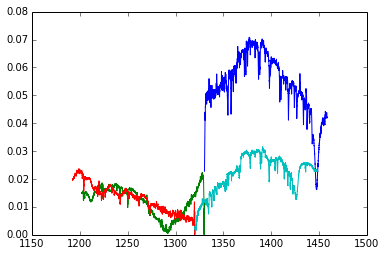

In [299]:
plot(swp.freqs,(np.abs(swp.data)),'-')
plot(swp2.freqs,(np.abs(swp2.data)),'-')
plot(swp3.freqs,(np.abs(swp3.data)),'-')
plot(swp4.freqs,(np.abs(swp4.data)),'-')

#xlim(1249,1251)

(-1, 0)

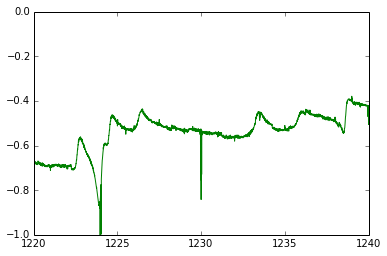

In [290]:
plot(swp.freqs,np.angle(swp.data*np.exp(-2j*31.299*swp.freqs*np.pi)))
plot(swp2.freqs,np.angle(swp2.data*np.exp(-2j*31.299*swp2.freqs*np.pi)))
xlim(1220,1240)
ylim(-1,0)

In [293]:
np.hstack((swp2.freqs,swp.freqs)).shape

(24576,)

In [294]:
np.savez('/home/gjones/2015-11-03-StarCryo-nevins-initial-sweep-1330-lo.npz',freqs=np.hstack((swp2.freqs,swp.freqs)),data=np.hstack((swp2.data,swp.data)),lo=1330.0)

In [300]:
np.savez('/home/gjones/2015-11-03-StarCryo-nevins-initial-sweep-1320-lo.npz',freqs=np.hstack((swp4.freqs,swp3.freqs)),data=np.hstack((swp4.data,swp3.data)),lo=1320.0)

In [223]:
dblk = np.zeros((swp.freqs.shape[0],8192),dtype=swp.blocks[0].data.dtype)
for k in range(swp.freqs.shape[0]):
    dblk[k,:] = swp.blocks[k].data[:]
dblk = dblk.reshape((dblk.shape[0],-1,32))
dm = np.abs(dblk).mean(1)
dm = dm - dm.mean(1)[:,None]


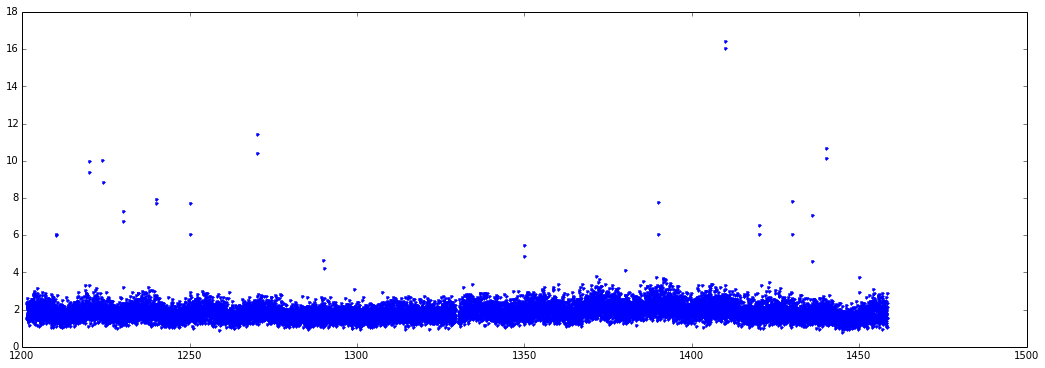

In [224]:
figure(figsize=(18,6))
plot(swp.freqs,dm.ptp(1),'.')
#ylim(0,5)

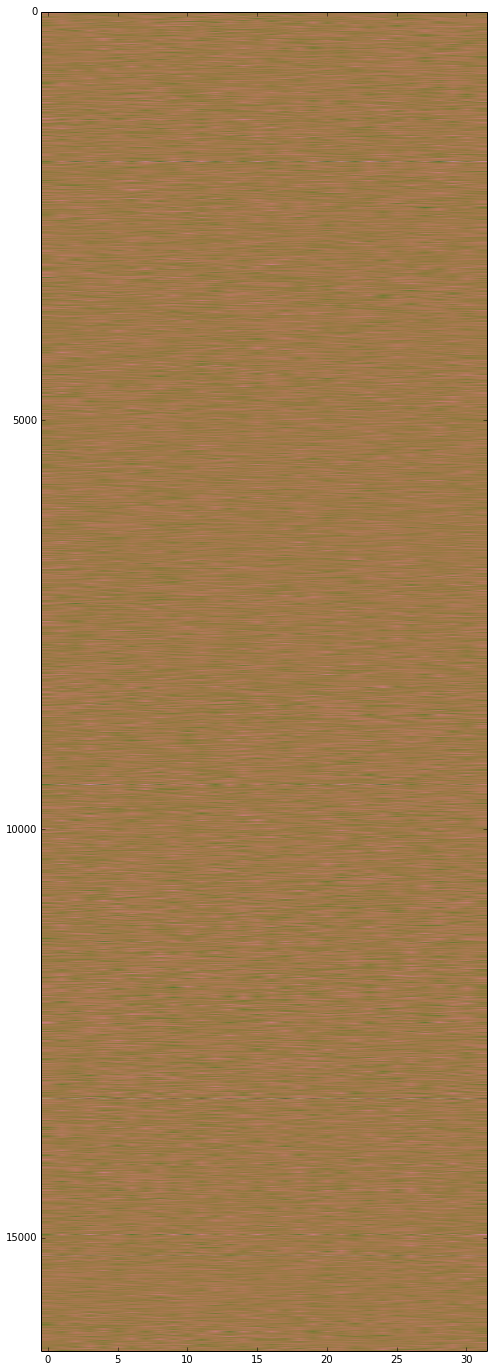

In [225]:
figure(figsize=(8,24))
imshow(dm,aspect='auto',cmap=cm.cubehelix)
clim(-10,10)

In [124]:
frq.shape

(8, 32)

In [277]:
ri.select_bank(13)

In [278]:
ri.select_fft_bins(range(32))

In [279]:
d,addr = ri.get_data(4,demod=False)

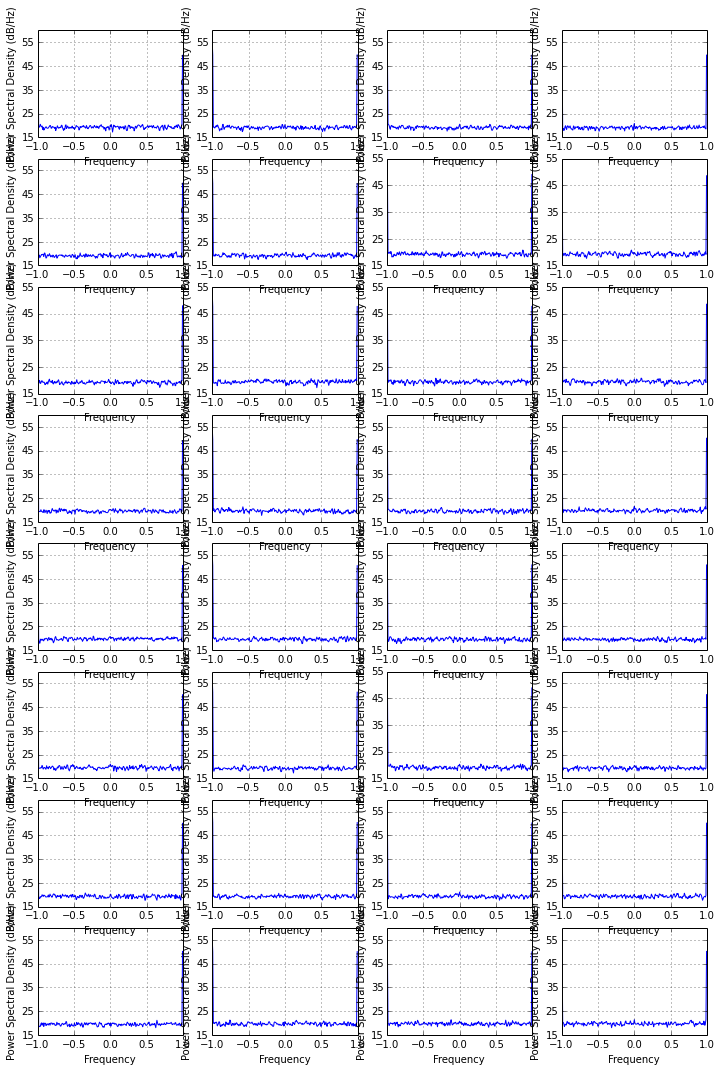

In [280]:
fig,axs = subplots(8,4,figsize=(12,18))
for k in range(32):
    ax = axs.flatten()[k]
    ax.psd(d[:,k])

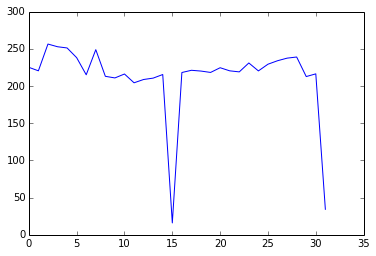

In [133]:
plot(np.abs(d).mean(0))